# Categorical Features, One-hot Encoding and Dimensionality Reduction

This notebook contains code and corresponding explanations for handling of categorical data, i.e. pitfalls when using one-hot encoding with subsequent PCA.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Data Generation
The next block contains the main method for generating samples.
~~~
    n_samples : number of (random)samples to generate
        n_cat : number of categorical features 
   n_cat_bins : number of discrete values for each categorical feature
       n_cont : number of additional continuous Gaussian random features
       center : (Boolean) subtract the mean
    normalize : (Boolean) subtract the mean, normalize each feature to be in range [-1, +1]
       whiten : (Boolean) subtract the mean, normalize each feature to have unit variance.
       return : (n_cat*n_cat_bins+n_cont) x n_samples numpy array
~~~

In [164]:
def generate_mixed_attribute_samples(n_samples=100, n_cat=1, n_cat_bins=5, n_cont=0, 
                                     center=False, normalize=False, whiten=False):
    samples = np.zeros((n_cat * n_cat_bins + n_cont, n_samples), dtype=np.float)
    labels = np.zeros((n_cat, n_samples), dtype=np.int)
    cnt = 0
    for n in range(n_cat):
        d = np.random.randint(0, n_cat_bins, size=n_samples)
        labels[n_cat, :] = d
        for b in range(n_cat_bins):
            samples[cnt + b, d==b] = 1.
        cnt += n_cat_bins
    samples[cnt:, :] = 0.1*np.random.randn(n_cont, n_samples)
    if center:
        samples -= np.mean(samples, axis=1)[:, np.newaxis]
    if normalize:
        samples -= np.mean(samples, axis=1)[:, np.newaxis]
        samples /= np.max(np.abs(samples), axis=1)[:, np.newaxis]
        print(np.max(samples, axis=1))
    if whiten:
        samples -= np.mean(samples, axis=1)[:, np.newaxis]
        samples /= np.std(samples, axis=1)[:, np.newaxis]        
        print(np.var(samples, axis=1))
    return samples

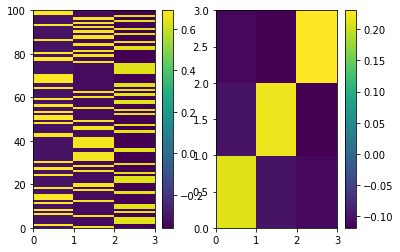

In [251]:
X = generate_mixed_attribute_samples(n_samples=100, n_cat=1, n_cat_bins=3, n_cont=0, 
                                     center=True, normalize=False, whiten=False)
C = X.dot(X.T) / X.shape[1]
plt.subplot(1, 2, 1)
plt.pcolor(X.T)
plt.colorbar()
plt.subplot(1, 2, 2)
plt.pcolor(C)
plt.colorbar()

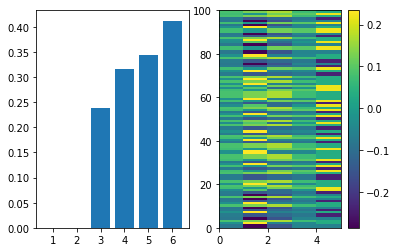

In [250]:
u, v = np.linalg.eig(C)
inds = np.argsort(u)  # sort ascending
u = u[inds]
v = v[inds, :]
Xr = v[1:, :].dot(np.diag(u)).dot(X)
plt.subplot(1, 2, 1)
# plt.pcolor(X.T)
# plt.colorbar()
plt.bar(np.arange(u.size), u)
plt.xticks(np.arange(u.size), np.arange(u.size)+1)

# plt.subplot(1, 2, 2)
# plt.pcolor(v.dot(np.diag(u).dot(v.T)))
# plt.colorbar()
plt.subplot(1, 2, 2)
plt.pcolor(Xr.T)
plt.colorbar()